In [17]:
import fenics
from make_fenics_amg_solver import make_fenics_amg_solver
import matplotlib.pyplot as plt

In [18]:
mesh = fenics.UnitSquareMesh(30,33)
V = fenics.FunctionSpace(mesh, 'CG', 2)

Text(0.5, 1.0, 'w_lu')

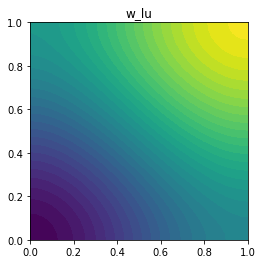

In [26]:
u = fenics.TrialFunction(V)
v = fenics.TestFunction(V)
a = fenics.inner(fenics.grad(u), fenics.grad(v))*fenics.dx + u*v*fenics.dx
source = fenics.Expression('sin(x[0]) + x[1]', degree=2)
b = source * v * fenics.dx
w_lu = fenics.Function(V)
fenics.solve(a==b, w_lu)
fenics.plot(w_lu)
plt.title('w_lu')

Text(0.5, 1.0, 'w_amg')

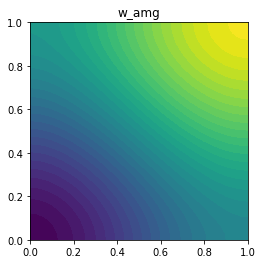

In [35]:
A = fenics.assemble(a)
B = fenics.assemble(b)
w_amg = fenics.Function(V)

solve_A = make_fenics_amg_solver(A)
w_amg.vector()[:] = solve_A(B)

fenics.plot(w_amg)
plt.title('w_amg')

In [33]:
err = fenics.norm(w_amg.vector() - w_lu.vector()) / fenics.norm(w_lu.vector())
print('err=', err)

err= 2.1729878347223088e-11
